In [ ]:
# USING RECTANGULAR INTEGRATION FOR HESTON MODEL- TO PRICE OPTION USING SEMI-ANALYTICAL APPROACH- ########

#### AHMET MAHMUT GOKKAYA #####

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# FİRSTLY DETERMINE LIBRARIES

In [71]:
kappa = 3.0 # ITS A MEAN REVERSION SPEED
theta = 0.09 # ITS A MEAN REVERSION LEVEL
sigma = 0.7 # VOLATILITY OF VARIANCE
rho = -0.8 # ITS A CORRELATION BETWEEN STOCK AND VARIANCE PROCESSES
v0 = 0.04 # FINALLY, ITS A INITIAL VARIANCE

# ALL OF THEM IS A APPROACH AND HYPOTHESIS !!!!!!

In [72]:
S0 = 200 # ITS ONLY INITIAL PRICE OF STOCK
K = 200 # ITS A STRIKE PRICE
T  = 1 # TIME TO EXPIRATION 
r = 0.04 # rısk free rate(use ınterest rate, fed)


In [73]:
N = 100 # number of steps in the integration
M = 100 # number of paths to simulate

In [79]:
mu = (r - 0.6 * v0) / kappa
sigma_S = np.sqrt(v0 / kappa)

In [80]:
# NOW COMPUTE THE INREGRATION STEPS SIZE .. 

dt = T / N

# AND INITIALIZE THE STOCK AND VARIANCE PROCESES . .

S = np.zeros ((M,N+1))
v = np.zeros((M, N+1))
S[:,0]= S0
v[:, 0]= v0

## BASICALLY, TO BE UNDERSTAND BETTER . .. .. 

# It looks like we are trying to initialize the stock process and variance process in a Monte Carlo simulation. 
# The dt variable is the integration step size, 
# which is calculated by dividing the total time T by the number of steps N. The S and v arrays will store the values of the 
# stock process and variance process at each time step. The initial values of the stock process and variance process are 
# set to S0 and v0, respectively.

#Here is some additional information about the Monte Carlo simulation:

#A Monte Carlo simulation is a method used to model the probability of certain outcomes in a process that 
#cannot be easily predicted due to the intervention of random variables

In [ ]:
### Simulate the stock and variance processes using the Euler-Maruyama method

In [ ]:
for i in range(M): 
    for j in range(N): 
        dW1 = np.random.normal(size=1) 
        dW2 = rho * dW1 + np.sqrt(1- rho**2) * np.random.normal(size=1) 
        S[i, j+1] = S[i, j] + mu * dt + sigma_S * np.sqrt(v[i, j]) * dW1 
        v[i, j+1] = v[i, j] + kappa * (theta- v[i, j]) * dt + sigma * np.sqrt(v[i, j]) * dW2
        
    # TO BE UNDERSTAND BETTER ....
# This code appears to be implementing the Heston model for simulating the evolution of stock prices over time. 
#The Heston model is a stochastic volatility model that describes the evolution of stock prices in a financial market. 

#In this code, S is the stock price at each time step, v is the variance of the stock price, 
#mu and sigma_S are the drift and volatility parameters of the stock price, respectively, 
#kappa and theta are the mean-reversion rate and long-run variance of the variance process, respectively,
#and sigma is the volatility of the variance process.

#The variables M and N are the number of independent simulations and time steps, respectively, and dt is the time step size.
#The parameter rho is the correlation between the two Brownian motions dW1 and dW2 that drive the stock price
#and variance processes, respectively.

In [82]:
K = np.ones(M) * K
C = np.mean(np.maximum(S[:,-1]- K, 0)) * np.exp(-r * T)

# The variable S is a matrix containing the simulated stock prices at the final time step, and M is the number of 
#independent simulations. The call option pays off the maximum of the difference between 
#the final stock price and the strike price, and the value of the option is obtained by taking 
#the average of these payoffs over all the 
#simulations and then discounting them back to the present using the risk-free interest rate r

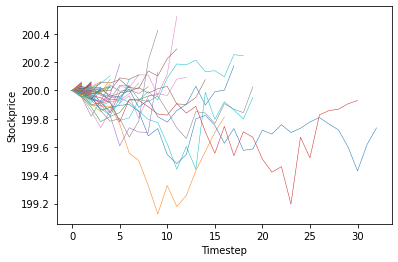

In [83]:
plt.plot(S.T,lw=0.5)
plt.xlabel('Timestep') 
plt.ylabel('Stockprice') 
plt.show()

In [ ]:
# ALL OF THEM IS A APPROACHES AND RANDOM VARIABLE ####

In [ ]:




### AHMET MAHMUT GOKKAYA ####